<a href="https://colab.research.google.com/github/IvanMGro/montecarlo/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montecarlo Birthday Problem

¿Cuál es la probabilidad de que dos personas cumplan el mismo día en un grupo de ```n``` personas?

In [4]:
import numpy as np

def montecarlo(n_personas,iterations):

    results = []
   
    for i in range(iterations):

        #Cada elemento es una persona y su valor corresponde al dia que cumple años
        bthday_list = [] 
        
        #Para cada n persona asignamos un num aleatorio por persona (1,365)
        for n in range(n_personas):
            n_birth = np.random.randint(1,365)
            bthday_list.append(n_birth)

        #Obtenemos una lista sin repeticiones de cumpleaños
        unique_list = list(set(bthday_list))      

        #Cuando esta condicion se cumple implica que 2 personas o más coinciden
        #Ejemplo: len[2,65,349,65] - len[2,65,349] =  1. Se cumple
        if (len(bthday_list)-len(unique_list))>0: 
            true_match = 1
        else:
            true_match = 0
        results.append(true_match)
    
    #probabilidad = cantidad_matches / num_iteraciones
    pb = sum(results) / len(results)
    
    return pb

¿Cuál es la probabilidad de que 2 personas cumplan el 
mismo día en un grupo de 50 personas?. La probabilidad converge / se acerca más a un valor conforme aumenta el número de iteraciones, en este caso el valor es ```97.07```

In [11]:
pb = montecarlo(50,10000)
print("La probabilidad es del:", pb*100, "%")

La probabilidad es del: 97.0716 %


Realizamos este experimento y graficamos sus resultados obteniendo la probabilidad ```pb``` en cada caso de ```n``` personas

Text(0, 0.5, 'Prob %')

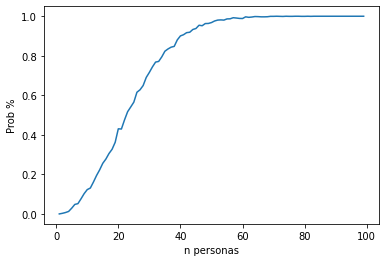

In [6]:
fy = []
fx = []

#Vamos a correr 1000 veces el mismo experimento para 100 escenarios.
#En cada escenario aumenta el numero de personas es n+1

for n in range(100)[1:]:
    #Entre mayor es el número de iteraciones mayor es la precisión del gráfico
    proby = montecarlo(n,2000) 
    probx = n                  
    fy.append(proby)           
    fx.append(probx)
    
#Graficamos los resultados
import matplotlib.pyplot as plt
plt.plot(fx,fy)
plt.xlabel("n personas")
plt.ylabel("Prob %")
#Entre mayor es el número de iteraciones, la curva se vuelve mas suave

# Calculando π con el método montecarlo

Este método puede emplearse para calcular ```π```. La idea es la misma. Generamos números aleatorios, en este caso corresponde a puntos aleatorios ```(x,y)```, los cuales pueden caer dentro o fuera del área del círculo. 

Fuente: https://mcnp.lanl.gov/pdf_files/la-ur-05-4983.pdf

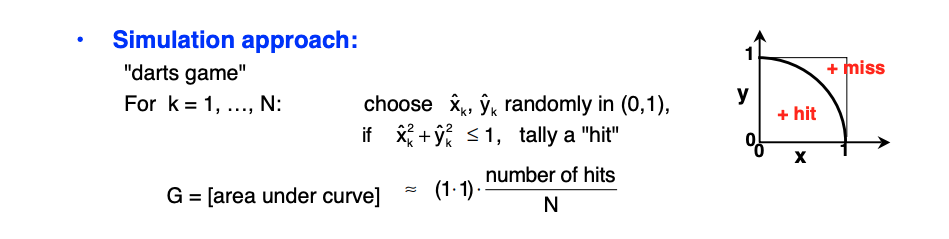

La idea es simplemente verificar si cada punto generado ```(x,y)``` cae dentro del área definida por $x^2 + y^2 \le 1 $. Este experimento solo lo realizaremos 
sobre el primer cuadrante de nuestro plano cartesiano, por lo que ```x``` y ```y```solo puede tomar valores de 0 a 1.

In [28]:
def circle(x,y):
    z = x**2 + y**2
    return z

def pi_montecarlo(iterations):

    results = []
    
    for i in range(iterations):
        
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        
        match = circle(x,y)
        
        if match <= 1:
            inside = 1
        else:
            inside = 0        
        results.append(inside)
            
    pb = sum(results) / len(results)
    
    return pb

Multiplicamos el valor obtenido por 4, ya que solo utilizabamos una cuarta parte del círculo

In [32]:
pi = pi_montecarlo(10000000)*4
print("el valor de π estimado es:", pi)

el valor de π estimado es: 3.1418916


Observamos como entre mayor es el número de iteraciones, la probabilidad converge/ se acerca a un valor definido

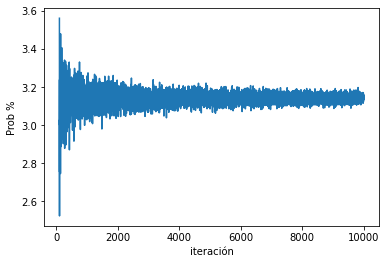

In [20]:
fy = []
fx = []

for it in range(10000)[100:]:
    proby = pi_montecarlo(it)/0.25
    probx = it
    fy.append(proby)
    fx.append(probx)
    
import matplotlib.pyplot as plt
plt.plot(fx,fy)
plt.xlabel("iteración")
plt.ylabel("Prob %")
plt.show()

Este es una descripción gráfica de como evoluciona el valor de pi conforme generamos más puntos aleatorios.

Fuente: https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo#/media/Archivo:Estimacion_de_Pi_por_Montercarlo.gif

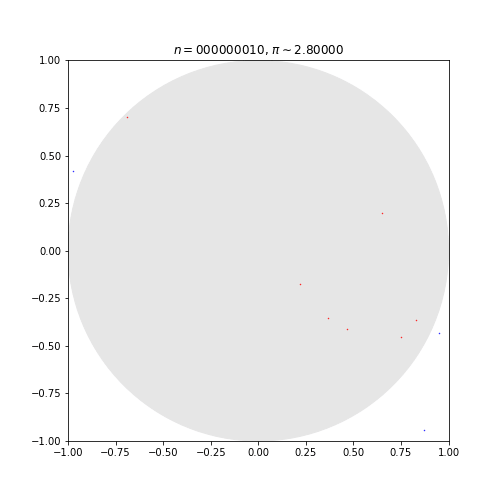